# Customer Churn Prediction

The purpose of this project is to predict if a customer will churn or not using classification machine learning model.

This model is built a machine learning library: **Scikit-Learn**.

Data Source: 

### Project Plan
* Import the useful python libraries
* Load the data
* Preapre data: data cleaning and consistency in data
* Validation framework
* Exploratory Data Analysis (EDA): visualization and statistics
* Feature Importance: Churn Rate and Risk Ratio
* Use linear regression model for price prediction
* Evaluate the performance of the model

### Improt Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the data

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Data Preparation

###### Ensure all are in lower case and replaces every spaces with underscore

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

###### Ensure all values in each non-numerical columns are consistent: change to lower case

In [6]:
strings_col = list(df.dtypes[df.dtypes == 'object'].index)
strings_col

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [7]:
# the input of thelambda function is a series when apply function is used on a dataframe
df = df.apply(lambda x: x.str.lower() if x.name in strings_col else x)

In [8]:
df.head(2).T

,0,1
customerid,7590-vhveg,5575-gnvde
gender,female,male
seniorcitizen,0,0
partner,yes,no
dependents,no,no
tenure,1,34
phoneservice,no,yes
multiplelines,no phone service,no
internetservice,dsl,dsl
onlinesecurity,no,yes


###### Data Integrity

In [9]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

I couldnt convert the `totalcharges` column to numerical type because some of its values are empty value like ' '

In [10]:
# total charges is an object type but holds numerical values: convert it
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [11]:
# fill the missing values with zeroes:
df['totalcharges'] = df['totalcharges'].fillna(0)

###### Convert the churn variable to numerical type

In [12]:
# let yes be 1
df['churn'] = (df['churn'] == 'yes').astype('int')

### Validation Framework

* Split the data into train, validation and test set using scikit-learn

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [15]:
# splitting the df_full_train into train and validation set:
# the validation set is 20% of the whole dataset, which is 25% of the df_full_train

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [16]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [17]:
# obtain the churn values for train, val and test set
y_train = df_train['churn']
y_val = df_val['churn']
y_test = df_test['churn']

In [18]:
# delete the churn variables from the train, val and test set set
df_train.drop('churn', axis=1, inplace=True)
df_val.drop('churn', axis=1, inplace=True)
df_test.drop('churn', axis=1, inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Exploratory Data Analysis
* check for missing values
* Look at the targte variables (churn)
* Look at numerical and categorical variables

In [19]:
# using the df_full_train: combination of train and validation set
df_full_train = df_full_train.reset_index(drop=True)

###### Check for missing values

In [20]:
df_full_train.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

There is nomissing values in the dataset

###### Distribution of the churning data

In [21]:
# churn rate
churn_count = df_full_train['churn'].value_counts()
churn_count

0    4113
1    1521
Name: churn, dtype: int64

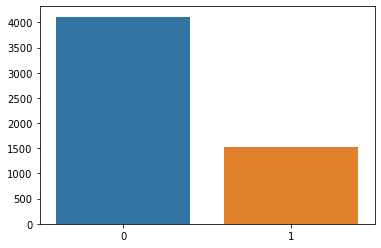

In [22]:
ax = sns.barplot(x=churn_count.index, y=churn_count.values)
plt.show()

The numbr of those who churn from the available full training set is: `1521`

###### Get the numerical and categorical column

In [23]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [24]:
df_full_train.dtypes[df_full_train.dtypes != 'object'].index

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn'], dtype='object')

In [25]:
# copy and paste the result above and remove the unwanted numerical column: 
# churn is target and seniorcitizen is categorical
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [26]:
df_full_train.dtypes[df_full_train.dtypes == 'object'].index

Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [27]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod']

In [28]:
# unique values in the categorical features
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature Importance: Categorical variable

Which features affect our target variables

* Churn Rate
* Risk Ratio
* Mutual Information 

###### Globsl Churn Rate

In [29]:
global_churn_rate = round(df_full_train.churn.mean(), 3)
global_churn_rate

0.27

Each customers have 27% chances of churning

###### Churn rate wihin each group in each feature

In [30]:
for cat in categorical:
    print('*'*30)
    print(f"{cat} Churn Rate")
    print('*'*30)
    for unique in df_full_train[cat].unique():
        churn_rate = df_full_train[df_full_train[cat] == unique].churn.mean()
        print(f"{unique}: {round(churn_rate, 3)}")
        print(f"Difference of churn rate of '{unique}' category from the global churn rate: {round(global_churn_rate - churn_rate, 3)}")
    print("") 

******************************
gender Churn Rate
******************************
male: 0.263
Difference of churn rate of 'male' category from the global churn rate: 0.007
female: 0.277
Difference of churn rate of 'female' category from the global churn rate: -0.007

******************************
seniorcitizen Churn Rate
******************************
0: 0.242
Difference of churn rate of '0' category from the global churn rate: 0.028
1: 0.413
Difference of churn rate of '1' category from the global churn rate: -0.143

******************************
partner Churn Rate
******************************
yes: 0.205
Difference of churn rate of 'yes' category from the global churn rate: 0.065
no: 0.33
Difference of churn rate of 'no' category from the global churn rate: -0.06

******************************
dependents Churn Rate
******************************
yes: 0.166
Difference of churn rate of 'yes' category from the global churn rate: 0.104
no: 0.314
Difference of churn rate of 'no' categor

###### Metrics for Feature Importance*
* **Difference:** if `global churn rate` - `group churn rate` < 0, it means the group is more likely to churn.
* **Risk Ratio:** if `group churn rate` / `global churn rate` > 1, group is more likely to churn.

E.g: People without partner are more likely to churn.

The partner feature is more important for predicting churn than the gender variable. Thus is because the difference of the global churn and the partner churn is larger than that of gender churn. Especiafically for those who have partners.

###### Mutual Information (MI)

* MI of two random variables is a measure of the mutual dependence between the two categorical variables. $I(x,y) = H(y) - H(x|y)$ where H stands for entropy.
* Higher MI value means more importance
* We will use sklearn mutual information metrics to measure the imfortance of features for predicting churn

In [31]:
from sklearn.metrics import mutual_info_score

In [32]:
mi = df_full_train[categorical].apply(lambda x: mutual_info_score(df_full_train[x.name], df_full_train.churn))
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Feature Improtance: Correlation

* Correlations is the metrics for selecting important numerical variables
* Correlation coefficient is the measure of dependencies between two variables
* Positive correlation: higher the churn rate
* Negative correlation: lower the churn rate
* Zero correlation: no effect on churn rate

In [33]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

* The higher the `tenure` and `total_charges`, the lower the `churn rate`
* The higher the `monthly charges`, the higher the `churn rate`

Let's see the different churn rate for different years of tenure

In [34]:
df_full_train['tenure'].unique()

array([12, 42, 71, 30,  9, 72, 28,  6, 47, 22,  2,  3,  4, 60, 69, 26, 33,
        8, 27, 25, 23, 34, 59, 66,  5, 45, 49, 24,  1, 40, 51, 68, 32, 44,
       67, 11, 53,  7, 55, 31, 13, 63, 64, 10, 62, 35, 57, 20, 65, 18, 46,
       29, 37, 48, 15, 61, 14, 70, 52, 54, 19, 50, 43, 16, 36, 38, 56, 17,
       41, 39, 58, 21,  0], dtype=int64)

In [35]:
# those who spent less than 6 years 
df_full_train[df_full_train['tenure'] < 6].churn.mean()

0.5479204339963833

In [34]:
# those who spent more than 5 years and less than 13 years
df_full_train[(df_full_train['tenure'] > 5) & (df_full_train['tenure'] < 13)].churn.mean()

0.35419847328244275

In [35]:
# those who spent more than 5 years and less than 13 years
df_full_train[df_full_train['tenure'] > 12].churn.mean()

0.17634908339788277

It can be said that churn rate decreases with time which corresponds with the correlation coefficient above

### One-Hot Encoding

Using Scikit-Learn to encode the categorical values.
* Using DictVectorizer of Scikit-Learn
* Even if fit the DictVectorizer with categorical and numerical data, it is smart enough to only encode the categorical variables

In [36]:
from sklearn.feature_extraction import DictVectorizer 

In [51]:
dv_df = pd.DataFrame({'Food':['Rice', 'Beans'], 'Price':[400, 500]})
dv_df

,Food,Price
0,Rice,400
1,Beans,500


In [53]:
dv_df.to_dict()

{'Food': {0: 'Rice', 1: 'Beans'}, 'Price': {0: 400, 1: 500}}

In [55]:
oriented_dv_df = dv_df.to_dict(orient='records')
oriented_dv_df

[{'Food': 'Rice', 'Price': 400}, {'Food': 'Beans', 'Price': 500}]

In [60]:
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
vd = v.fit_transform(oriented_dv_df)
vd

array([[  0.,   1., 400.],
       [  1.,   0., 500.]])

**Note:** the categorical values in each record is one hot-encoded by the DictVectorizer 

###### Fit transform the training dataset

In [61]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [62]:
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [63]:
dv = DictVectorizer(sparse=False) 

In [64]:
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [65]:
X_train = dv.transform(train_dict)

In [66]:
# checking the shape of the transformed data
X_train.shape

(4225, 45)

In [68]:
# checking the shape of the original data
df_train[categorical + numerical].shape

(4225, 19)

###### Transform the validation set

In [69]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')

In [70]:
X_val = dv.transform(val_dict)

In [71]:
X_val.shape

(1409, 45)

### Logistic Regression

* Binary classification
* Linear vs Logistic regression

In [73]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [74]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result 

### Training Logistic Regression with Scikit-Learn
  
* Train a model
* Apply it to validation data
* Calculate the accuracy

In [75]:
from sklearn.linear_model import LogisticRegression

###### Train model on the training set

In [76]:
lr = LogisticRegression()

In [77]:
lr.fit(X_train, y_train)

LogisticRegression()

###### Predict model on the train set

In [78]:
# obtain the probability of each class when predicting
pred_train = lr.predict_proba(X_train)
pred_train[:5]

array([[0.90452073, 0.09547927],
       [0.32067002, 0.67932998],
       [0.36631917, 0.63368083],
       [0.28247754, 0.71752246],
       [0.95232182, 0.04767818]])

* The first column is the probabilty of being negative (0) while the sexond column is the probability of being positive (1).
* But we are only interested in the probability of the positive category. 

###### Predict model on the train set

In [79]:
pred_val = lr.predict_proba(X_val)

In [80]:
pred_val = pred_val[:, 1]

In [81]:
val_churn_decision = pred_val >= 0.5

In [82]:
# the customer IDs of those that will churn
df_val[val_churn_decision].customerid

2504    8433-wxgna
4597    3440-jpscl
2343    2637-fkfsy
5591    7228-omtpn
4482    6711-fldfb
           ...    
2611    5976-jcjrh
4211    2034-cgrhz
3999    5276-kqwhg
6240    6521-yytyi
5282    3049-solay
Name: customerid, Length: 311, dtype: object

###### Evaluate the validation prediction

In [83]:
# accuracy
(y_val == val_churn_decision).mean()

0.8034066713981547

In [84]:
df_pred = pd.DataFrame()

In [86]:
df_pred['Churn_Prob.'] = pred_val
df_pred['Actual'] = y_val.values
df_pred['Predicted'] = val_churn_decision.astype('int')
df_pred['Correct_pred.'] = df_pred['Actual'] == df_pred['Predicted'] 

In [87]:
df_pred

,Churn_Prob.,Actual,Predicted,Correct_pred.
0,0.008997,0,0,True
1,0.204511,0,0,True
2,0.212212,0,0,True
3,0.543050,1,1,True
4,0.213776,0,0,True
...,...,...,...,...
1404,0.313665,0,0,True
1405,0.039358,1,0,False
1406,0.136388,0,0,True
1407,0.799769,1,1,True


### Model Interpretation

* Look at the weights of the features
* Train a smaller model with fewer features

#### Interpreting Regression Coefficient and P-Value

* The **coefficients** tells relationship between the dependent vatiable and independent variables.
* **P-value** indicates whether the relationship are statistically significance. I.e if the relationship that exist in a sample can still exist in a larger population.
* **P-value** test the null hypothesis.
* The **null hypothesis** states that there is no relationship between the dependent and independent variable.
* **Statistical Significance:** the likelyhood that observation in sampled data is due to chance.
* **Sampling Error:** error due to the fact that we are using sampled data rather than population data.
* **P-value** is used for measuring significance. It's the probability that our finding is due to sampling error and it must be less than significance level (0.05) and so we are 95% sure our finding is not due is not due Which is the confidence level.
* if **p-value < significance-level**, we will fail to accept the null hypothesis. Meaning there exist a relationship between the variables in a larger population and this variable (with lower p-value) is said to be statistically significant and it is to be included in the regression model.
* if **p-value > significance-level**, accept the null hypothesis. Meaning that there is no sufficient evidence to conclude that a relationship exist in a larger population. 
* **Positive Coefficient:** as independent variable increases/decreases, dependent variable also increases/decreases.
* **Negative Coefficient:** as independent variable increases, dependent variable also decreases and vice-versa.
* **Coefficient Value:** this indicates a mean change in the dependent variable given a one-unit change in the independent variable given all other variables are constant. Example: Height is in meter (m) and its coefficient as an indendent variable to weight is 106. If height increases by 1m then weight will increase by 106.  

#### Effect Size
This the degree of the relationship that exist between the dependent variable and independent variable.

The following are the method for measuring this effect:

* **Pearson Correlation Coefficient (r):** values ranges betweeb -1 and 1. 0 means no correlation. Values close to +1 means the variables are moving in the same direction and values closer to -1 means the variables are moving in opposite direction.
* **R-Squered**: This tells us the variability of correlation. It is the proportion of total variance our model explains.

In [1]:
lr.coef_

NameError: name 'lr' is not defined

In [92]:
features_coef = dict(zip(dv.get_feature_names(), lr.coef_[0].round(3)))

In [93]:
features_coef

{'contract=month-to-month': 0.475,
 'contract=one year': -0.175,
 'contract=two year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no internet service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no phone service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no internet service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no internet service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank transfer (automatic)': -0.087,
 'paymentmethod=credit card (automatic)': -0.032,
 'paymentmethod=electronic check': 0.07,
 

###### Smaller Model

In [111]:
small = ['contract', 'tenure', 'monthlycharges']

In [112]:
train_small = df_train[small].to_dict(orient='records')
val_small = df_val[small].to_dict(orient='records')

In [113]:
# sencode the data
dv_small = DictVectorizer(sparse=False)

In [114]:
X_train_small = dv_small.fit_transform(train_small)
X_val_small = dv_small.transform(val_small)

In [115]:
# create model object
lr_small  = LogisticRegression()
lr.fit(X_train_small, y_train)

LogisticRegression()

In [116]:
w0 = lr.intercept_
print(w0)
w = lr.coef_
w.round(3)

[-2.47677566]


array([[ 0.97 , -0.025, -0.949,  0.027, -0.036]])

In [117]:
features_coef_small = dict(zip(dv.get_feature_names(), lr.coef_[0].round(3)))
features_coef_small 

{'contract=month-to-month': 0.97,
 'contract=one year': -0.025,
 'contract=two year': -0.949,
 'dependents=no': 0.027,
 'dependents=yes': -0.036}

### Using The Model

###### Train the full train set

In [118]:
dict_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dict_test = df_test[categorical + numerical].to_dict(orient='records')

In [119]:
dv_full = DictVectorizer(sparse=False)

In [120]:
# fit and transform the fulltraining set
X_full_train = dv_full.fit_transform(dict_full_train)

# only tranform the test set
X_test = dv_full.transform(dict_test)

In [121]:
# obtain the target variable (churn) 
y_full_train = df_full_train.churn

In [122]:
# create the logitiv regression object
lr_full = LogisticRegression()

# fit the model on the training examples 
lr_full.fit(X_full_train, y_full_train)

LogisticRegression()

In [123]:
pred_test = lr_full.predict_proba(X_test)[:, 1]

In [124]:
full_churn_decision = pred_test >= 0.5

In [125]:
# evaluate the accuracy of model
(full_churn_decision == y_test).mean()

0.815471965933286

From the above, there is no much difference between the validation error `(0.80341)` and the test error `(0.815472)`

###### Using the model to make prediction

In [126]:
# predict the 10th obbservation from the test data set
customer = dict_test[10]

In [127]:
# transform the customer data to one hot encode it
X_customer = dv_full.transform(customer)

In [128]:
X_customer.shape

(1, 45)

In [129]:
# make prediction of the probability of the custormer churning
customer_pred = lr_full.predict_proba(X_customer)

In [130]:
customer_pred

array([[0.5943189, 0.4056811]])

Since the churn probability value is less than 0.5 (threshold above which customer will churn), we can say that this customer will not churn.

In [131]:
lr_full.predict(X_customer)

array([0])

In [132]:
# lets observe the actual value
y_test.reset_index(drop=True)[10]

0

We predicted that the customer will not churn and in truth, the customer did not churn.

### Accuracy and Dummy Model

**Accuracy:** accuracy of churned customers is the fraction of the number correctly predicted churned customers to the whole number of customers in the set

* Evaluate the model on different threshold.
* Check the accuracy of dummy baselines.

###### Try multiple threshold: for the validation set using sklearn to calculate the accuracy

In [133]:
from sklearn.metrics import accuracy_score

In [163]:
# creating a dummy model

threshold = np.linspace(0, 1, 21)
threshold_accuracy = {}

for t in threshold:
    val_churn_decision = pred_val >= t
    accr = accuracy_score(y_val, val_churn_decision)
    threshold_accuracy[round(t, 2)] = round(accr, 3)
        
best_threshold = sorted(threshold_accuracy.items(), key=lambda x: x[1], reverse=True)
print(f"Best Threshold: {best_threshold[0][0]}\nAccuracy: {best_threshold[0][1]}")
print()
t_accuracy

Best Threshold: 0.5
Accuracy: 0.803



{0.0: 0.274,
 0.05: 0.509,
 0.1: 0.591,
 0.15: 0.666,
 0.2: 0.71,
 0.25: 0.739,
 0.3: 0.76,
 0.35: 0.772,
 0.4: 0.785,
 0.45: 0.793,
 0.5: 0.803,
 0.55: 0.801,
 0.6: 0.795,
 0.65: 0.786,
 0.7: 0.766,
 0.75: 0.744,
 0.8: 0.735,
 0.85: 0.726,
 0.9: 0.726,
 0.95: 0.726,
 1.0: 0.726}

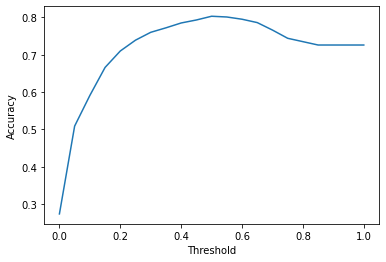

In [166]:
plt.plot(threshold, threshold_accuracy.values())
plt.ylabel("Accuracy")
plt.xlabel("Threshold")
plt.show()

**Observations:** 
* From the `thresh_hold` dicitonary above, when threshold is 1.0, accuracy is 0.73 and in reality, no probabability value is greater than 1. Therefore, 0.73 is the fraction of those who are actually not churning and there is no fraction of those who are churning.
* This accuracy is quite good as the accuracy of churn (0.803) from our model.
* This is as a result of class imbalance (fracton of those who churn is 0.27).
* Class imbalance mean we have a lot more customers who are not churning than those who are churning.
* In a case where there is class imbalance, accuracy is not a good metrics for evaluating the model.

**Note:** <span style="color: red">this is the main reason accuracy is not the best metric to use for this case. It does not tell us how good the model is.</span>

### Confusion Model

Confusion model tells us about the accuracy accross different classes/categories
* Different types of error and decision 
* Arranging them in table

In [177]:
# threshold
t = 0.5

In [172]:
# actual: let positive=churn and negative=not churn
actual_positive = y_val == 1
actual_negative = y_val == 0

In [178]:
# predicted
pred_positive = pred_val >= t 
pred_negative = pred_val < t

In [179]:
# true positive
tp = sum(actual_positive & pred_positive)
tp

210

In [181]:
# true negative
tn = sum(actual_negative & pred_negative)
tn

922

In [183]:
# false positive and false negative
fp = sum(pred_positive & actual_negative)
fn = sum(pred_negative & actual_positive)
fp, fn

(101, 176)

###### Confusion Matrix

In [187]:
confusion_matrix = np.array([[tn, fp],
                             [fn, tp]
                            ])

In [188]:
confusion_matrix

array([[922, 101],
       [176, 210]])

In [195]:
df_confusion_matrix = pd.DataFrame(confusion_matrix)
df_confusion_matrix.columns = ['predicted_neg', 'predicted_pos']
df_confusion_matrix.index = ['actual_neg', 'actual_pos']

In [196]:
df_confusion_matrix

,predicted_neg,predicted_pos
actual_neg,922,101
actual_pos,176,210


In [193]:
# fraction of the values in confusion matrix
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

From the result above: 

$accuracy = 0.65 + 0.15 = 0.8%$  which is same as the accuracy we got when the model was evaluated using accuracy.

$Accuracy = \dfrac{(TP + TN)}{(TP + TN + FP + FN)}$

### Precision & Recall

###### Precision
This is the fraction of correctly predicted positive churn to total predicted positive churn.<br>
$Precision = \dfrac{TP}{(TP + FP)}$

In [205]:
precision = tp / (tp + fp)
print(f"Precision of model: {round(precision, 2)*100}%")

Precision of model: 68.0%


###### Recall
* This is the fraction of correctly predicted positive churn to total positive churn.
* Its result is the accuracy of each class. E.g the accuracy of the positive churn is shown below and calculated in the next cell.<br>

$Recall = \dfrac{TP}{(TP + FN)}$

In [210]:
recall = tp / (tp + fn)
print(f"Recall of model: {round(recall, 2)*100}%")
print(f"From the result above, {100 - (round(recall, 2)*100)}% of customers who were churning were not identified.")

Recall of model: 54.0%
From the result above, 46.0% of customers who were churning were not identified.


<p style="color: green;"><b><i>Recall</i></b> helps us to determine the accuracy of model on the target class, which <b><i>Accuracy</i></b> do not give account of.</p>

### ROC Curves

###### False Positive Rate
* This is the ratio of the total number of wrongly predicted negative examples to the total number of actual negative
* It is the fraction of all negative examples that are predicted incorrectly (false positive)
* The aim is to minimize FPR

$FPR = \dfrac{FP}{TN + FP} $

###### True Positive Rate
* This is the ratio of the total number of correctly predicted positive examples to the total number of actual positive examples.
* This is still known as the recall of the positive class.
* The aim is to miximize TPR

$TPR = \dfrac{TP}{FN + TP} $

In [211]:
# calculate the TPR
tpr = recall
tpr

0.5440414507772021

In [212]:
# calculate the FPR
fpr = fp / (fp + tn)
fpr

0.09872922776148582

In [228]:
threshold = np.linspace(0, 1, 101)
scores = []

for t in threshold:
    # actual
    actual_positive = y_val == 1
    actual_negative = y_val == 0
    
    # predicted
    pred_positive = pred_val >= t 
    pred_negative = pred_val < t
    
    
    tp = sum(actual_positive & pred_positive)
    tn = sum(actual_negative & pred_negative)
    
    fp = sum(pred_positive & actual_negative)
    fn = sum(pred_negative & actual_positive)
    
    scores.append((t, tp, fp, fn, tn))

In [229]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,913,1,110
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,715,5,308
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [230]:
# calculate the TPR and FPR
df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)
df_scores['tpr'] = df_scores.tp / (df_scores.fn + df_scores.tp)

In [231]:
df_scores

,threshold,tp,fp,fn,tn,fpr,tpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,913,1,110,0.892473,0.997409
2,0.02,384,830,2,193,0.811339,0.994819
3,0.03,383,766,3,257,0.748778,0.992228
4,0.04,381,715,5,308,0.698925,0.987047
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.000000,0.000000
97,0.97,0,0,386,1023,0.000000,0.000000
98,0.98,0,0,386,1023,0.000000,0.000000
99,0.99,0,0,386,1023,0.000000,0.000000


###### Plot of the TPR and FPR

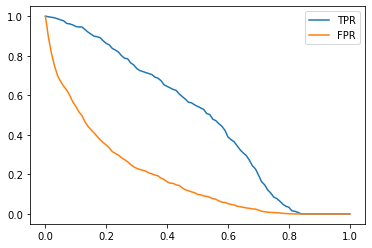

In [232]:
plt.plot(threshold, df_scores.tpr, label='TPR')
plt.plot(threshold, df_scores.fpr, label='FPR')

plt.legend()
plt.show()

### Random Model

Randomly create a predicted value from a uniform distribution of the same length as the validation target variable.

In [238]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [242]:
def tpr_fpr_df(pred_y, actual_y):
    threshold = np.linspace(0, 1, 101)
    scores = []

    for t in threshold:
        # actual
        actual_positive = actual_y == 1
        actual_negative = actual_y == 0

        # predicted
        pred_positive = pred_y >= t 
        pred_negative = pred_y < t


        tp = sum(actual_positive & pred_positive)
        tn = sum(actual_negative & pred_negative)

        fp = sum(pred_positive & actual_negative)
        fn = sum(pred_negative & actual_positive)

        scores.append((t, tp, fp, fn, tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    # calculate the TPR and FPR
    df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)
    df_scores['tpr'] = df_scores.tp / (df_scores.fn + df_scores.tp)
    
    return df_scores

In [243]:
df_rand = tpr_fpr_df(y_rand, y_val)
df_rand[::10]

,threshold,tp,fp,fn,tn,fpr,tpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.902248,0.898964
20,0.2,307,822,79,201,0.803519,0.795337
30,0.3,276,724,110,299,0.707722,0.715026
40,0.4,237,624,149,399,0.609971,0.613990
50,0.5,202,518,184,505,0.506354,0.523316
60,0.6,161,409,225,614,0.399804,0.417098
70,0.7,121,302,265,721,0.295210,0.313472
80,0.8,78,206,308,817,0.201369,0.202073
90,0.9,40,101,346,922,0.098729,0.103627


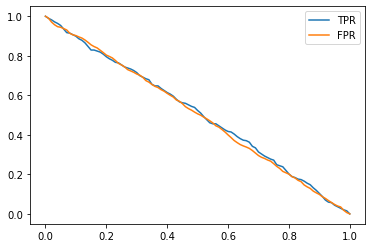

In [244]:
plt.plot(threshold, df_rand.tpr, label='TPR')
plt.plot(threshold, df_rand.fpr, label='FPR')

plt.legend()
plt.show()

### Ideal Model
* Ordering the customers based on their predicted prebability from smallest to highest so that customers who are not churning are arranged first followed by customers who are churning. 
* The purpose of this model is to see how TPR and FPR plot will look like

In [247]:
# calculate the total number of positive an negative example
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [250]:
# create a list starting with 1023 zeros followed by 386 ones
y_ideal = np.repeat([0, 1], [num_neg, num_pos])

In [251]:
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [252]:
y_ideal_pred = np.linspace(0, 1, len(y_ideal))

In [255]:
#  taking the mean of the negative examples in y_val
1 - y_val.mean()

0.7260468417317246

In [253]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [257]:
df_ideal = tpr_fpr_df(y_ideal_pred, y_ideal)
df_ideal[::10]

,threshold,tp,fp,fn,tn,fpr,tpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,0.862170,1.000000
20,0.2,386,741,0,282,0.724340,1.000000
30,0.3,386,600,0,423,0.586510,1.000000
40,0.4,386,459,0,564,0.448680,1.000000
50,0.5,386,319,0,704,0.311828,1.000000
60,0.6,386,178,0,845,0.173998,1.000000
70,0.7,386,37,0,986,0.036168,1.000000
80,0.8,282,0,104,1023,0.000000,0.730570
90,0.9,141,0,245,1023,0.000000,0.365285


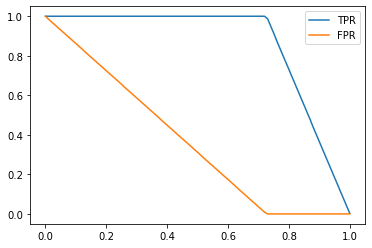

In [258]:
plt.plot(threshold, df_ideal.tpr, label='TPR')
plt.plot(threshold, df_ideal.fpr, label='FPR')

plt.legend()
plt.show()

As can be seen, the threshold at which the accuracy of TPR start to decrease is 0.726. This model can identify the churning customers correctly.

###### Putting all the plots together

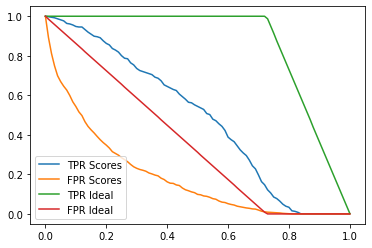

In [259]:
plt.plot(threshold, df_scores.tpr, label='TPR Scores')
plt.plot(threshold, df_scores.fpr, label='FPR Scores')
plt.plot(threshold, df_ideal.tpr, label='TPR Ideal')
plt.plot(threshold, df_ideal.fpr, label='FPR Ideal')

plt.legend()
plt.show()

We cam conlude that the closer the scores TPR is to the ideal TPR, the better the performance of the scores prediction. Same goes with the scores FPR and ideal FPR.

###### Plot of TPR and FPR

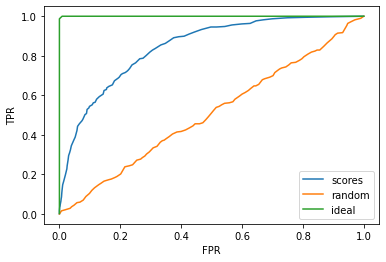

In [261]:
plt.plot(df_scores.fpr, df_scores.tpr, label='scores')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.show()

For a good model, the plot of the TPR and FPR of our model must be close to the joint of the ideal model (point where all the negative and positive examples are correctly predicted.

###### Using sklearn to determing the ROC curve values

In [262]:
from sklearn.metrics import roc_curve

In [267]:
fpr, tpr, thresholds = roc_curve(y_val, pred_val)

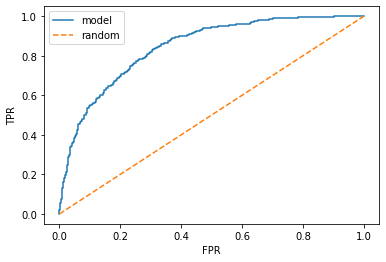

In [268]:
plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0, 1], label='random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.show()

### ROC AUC

ROC (Receiver Operating Curve): this is a graph showing the performance of a classification model at all classification thresholds.

AUC (Area Under the Curve): the larger the value (**min of 0 and max of 1)** of the area under the ROC Curve, the better the performance of the model.

In [269]:
from sklearn.metrics import auc

In [276]:
val_auc = auc(fpr, tpr)
print(f"The area under the ROC curve for the validation model is: {round(val_auc, 2)}")

The area under the ROC curve for the validation model is: 0.84


From the above auc method from sklearn.metrics, an alternative method that cal calculate the result is **roc_auc_score** but it uses the acutual value and the predicted value instead of using the fpr and tpr that is calculated by roc_curve and used in auc function.

In [278]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, pred_val)

0.8438530381535563

### Cross-Validation

Previously, We have splitted our data into train, validation and test set where we used the validation set to determine the best parameter for our model.

In this section, we will use K-Fold cross-validation to evaluate the performance of our model on different K validation set from may be 80% of the whole given data where K is an integer. The remaining 20% is the test set.

For larger data set, it is advisable to use smaller k split while for larger dataset, use more k split

* Evaluate the same model on different subset of data
* Getting the everage prediction and the spread within predictions.

In [310]:
def train(df_train, y_train, c=1.0):
    # convert the data frame to dictionary 
    dict_df = df_train[categorical + numerical].to_dict(orient='records') 
    
    # one-hot encode the categorical variable
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dict_df)
    
    model = LogisticRegression(C=c, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [311]:
dv, model = train(df_train, y_train, 0.001)

In [312]:
def predict(dv, model, df):
    # convert the data frame to dictionary 
    dict_df = df[categorical + numerical].to_dict(orient='records') 
    
    # one-hot encode the categorical variable
    X_test= dv.transform(dict_df)
    
    # predict the test data
    y_pred = model.predict_proba(X_test)[:, 1]
    
    return y_pred

In [313]:
pred = predict(dv, model, df_val)

###### Uaing the cross-validation model from the sklearn library

In [287]:
from sklearn.model_selection import KFold

In [316]:
!pip install tqdm

In [317]:
from tqdm.auto import tqdm

In [318]:
C = [0.001, 0.01, 0.1, 0.5, 1, 5, 10] 

for c in tqdm(C):
    scores = []
    
    n_split = 5
    
    # this is a generator
    kfolds= KFold(n_splits=n_split, random_state=1, shuffle=True)
    
    for train_idx, val_idx in tqdm(kfolds.split(df_full_train)):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, c)
        pred_val = predict(dv, model, df_val)

        auc = roc_auc_score(y_val, pred_val)
        scores.append(auc)
        
    print(f"C <=> {c}: {round(np.array(scores).mean(), 3)} +/- {round(np.array(scores).std(), 3)}")

  0%|          | 0/7 [00:00<?, ?it/s]

0it [00:00, ?it/s]

C <=> 0.001: 0.825 +/- 0.009


0it [00:00, ?it/s]

C <=> 0.01: 0.84 +/- 0.009


0it [00:00, ?it/s]

C <=> 0.1: 0.841 +/- 0.008


0it [00:00, ?it/s]

C <=> 0.5: 0.84 +/- 0.007


0it [00:00, ?it/s]

C <=> 1: 0.84 +/- 0.008


0it [00:00, ?it/s]

C <=> 5: 0.84 +/- 0.008


0it [00:00, ?it/s]

C <=> 10: 0.841 +/- 0.007


In [319]:
scores

[0.8422690770933583,
 0.8448818865050988,
 0.8325145494681918,
 0.8325665888597558,
 0.8517029588026732]

### Final Model

Train on the full dataset and test on the test dataset using the parametr `C = 0.1`

In [320]:
dv, model = train(df_full_train, df_full_train.churn, 0.1)
pred_test = predict(dv, model, df_test)
auc = roc_auc_score(y_test, pred_test)
auc

0.8572386167896259

This performs slightly better than the mean auc score of the validation dataset.

# Thank You!!!